In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 1.문제 정의
- 물고기 종류를 분류해보자

### 2.데이터 수집
- Weight: 무게
- Length1: 세로 길이
- Length2: 대각선 길이
- Length3: 가로 길이
- Height: 높이
- Width: 넓이

In [36]:
fish = pd.read_csv('Fish.csv')

In [37]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 3. 데이터 전처리

### 4. 탐색적 분석
- 기술통계, 상관관계 분석
- 시각화
(histogram, scatter, plot 등)
- 특성선택

In [ ]:
# 여러 가지 데이터 중 개인이 몇가지 선택하여 분석
# ->분석을 통해 자신의 선택이 맞는지 확인

In [38]:
fish.shape

(159, 7)

In [33]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, Bream to Smelt
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 8.7+ KB


In [39]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


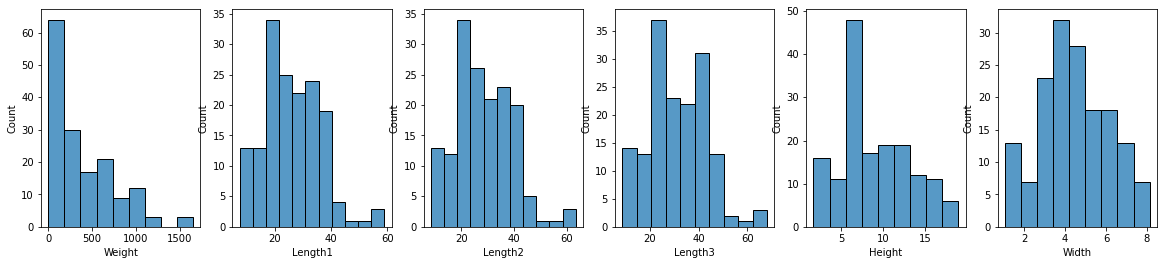

In [41]:
fig, ax = plt.subplots(ncols=6, figsize=(20,4))

variables = fish.columns[1:]
for i, var in enumerate(variables) : 
    sns.histplot(data=fish, x=var, ax=ax[i])
plt.show()

In [42]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [43]:
bream = fish[fish['Species']=='Bream']
num_bream = len(bream)

In [44]:
print(num_bream)

35


In [46]:
bream_weight = bream['Weight'].values
bream_length = bream['Length2'].values

In [47]:
bream_weight

array([ 242.,  290.,  340.,  363.,  430.,  450.,  500.,  390.,  450.,
        500.,  475.,  500.,  500.,  340.,  600.,  600.,  700.,  700.,
        610.,  650.,  575.,  685.,  620.,  680.,  700.,  725.,  720.,
        714.,  850., 1000.,  920.,  955.,  925.,  975.,  950.])

In [48]:
bream_length

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ])

In [49]:
smelt = fish[fish['Species']=='Smelt']
num_smelt = len(smelt)

In [50]:
print(num_smelt)

14


In [51]:
smelt_weight = smelt['Weight']
smelt_length = smelt['Length2']

In [52]:
smelt_weight

145     6.7
146     7.5
147     7.0
148     9.7
149     9.8
150     8.7
151    10.0
152     9.9
153     9.8
154    12.2
155    13.4
156    12.2
157    19.7
158    19.9
Name: Weight, dtype: float64

In [53]:
smelt_length

145     9.8
146    10.5
147    10.6
148    11.0
149    11.2
150    11.3
151    11.8
152    11.8
153    12.0
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length2, dtype: float64

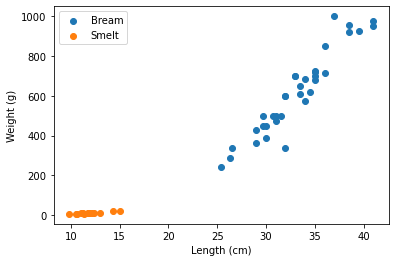

In [55]:
plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')

plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

In [56]:
bream_data = np.c_[bream_weight, bream_length]
len(bream_data)

35

In [57]:
smelt_data = np.c_[smelt_weight, smelt_length]
len(smelt_data)

14

In [59]:
fish_label = np.array([1] * num_bream + [0] * num_smelt)
fish_label
#1을 35개, 0을 14개 생성
# fish_label: 정답 값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [60]:
fish_data = np.r_[bream_data, smelt_data]
len(fish_data)
# 35+14=49개

49

### x: fish_data
### y: fish_label

In [71]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(fish_data, fish_label,
                                                    test_size=0.2, shuffle=True,
                                                    random_state=0)

### 5.모델정의

In [64]:
knn = KNeighborsClassifier(n_neighbors=1)

### 6.모델학습

In [65]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 7.모델예측 & 평가

In [66]:
pred = knn.predict(x_test)

In [67]:
knn.score(x_test, y_test)
#데이터의 개수가 적어서 과대적합 됨..

1.0

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
#metrics로 정확도 구하기 -> 결과는 같음
acc = accuracy_score(y_test, pred)

In [70]:
print(acc)

1.0
